### Data cleaning 3: outliers Assignment

#### Assignment

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Access this data using the Thinkful database using these credentials:

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

Data source: 
https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\katec\Thinkful\data_collections\states_all_extended.csv')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

#will need to use engine.dispose() when finished with queries
#engine.dispose()

education_df = original df with duplicate state names combined 
education1_df = cleaned & filled df (no missing values)
education2_df = winsored df (outliers)
education3_df = log transformed df (outliers)
education4_df = education1_df + BUDGET_DEFICIT column, winsor
education5_df = education1_df + BUDGET_DEFICIT column, log transformation
education6_df = copy education2_df (winsor) + BUDGET_DEFICIT column
education7_df = copy education3_df (log transf) + BUDGET_DEFICIT column

In [ ]:
education_df.head(10)

In [ ]:
education_df.info()

In [4]:
education_df.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [5]:
#from stackoverflow
#find missing and zero values (as seen in row 8)
def missing_zero_values_table(education_df):
        zero_val = (education_df == 0.00).astype(int).sum(axis=0)
        mis_val = education_df.isnull().sum()
        mis_val_percent = 100 * education_df.isnull().sum() / len(education_df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = education_df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(education_df.shape[1]) + " columns and " + str(education_df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(education_df)

Your selected dataframe has 25 columns and 1492 Rows.
There are 22 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
AVG_READING_8_SCORE,0,994,66.6,994,66.6,float64
AVG_MATH_8_SCORE,0,960,64.3,960,64.3,float64
AVG_READING_4_SCORE,0,959,64.3,959,64.3,float64
AVG_MATH_4_SCORE,0,956,64.1,956,64.1,float64
OTHER_EXPENDITURE,0,263,17.6,263,17.6,float64
ENROLL,0,263,17.6,263,17.6,float64
INSTRUCTION_EXPENDITURE,0,212,14.2,212,14.2,float64
SUPPORT_SERVICES_EXPENDITURE,0,212,14.2,212,14.2,float64
TOTAL_EXPENDITURE,0,212,14.2,212,14.2,float64
CAPITAL_OUTLAY_EXPENDITURE,0,212,14.2,212,14.2,float64


In [6]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


Don't forget to apply the most suitable missing value filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

In [7]:
education_df['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'WYOMING', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'BUREAU_OF_INDIAN_AFFAIRS',
       'DOD_OVERSEAS', 'DOD_DOMESTIC', 'AMERICAN_SAMOA', 'GUAM',
       'NORTHERN_MARIANAS', 'PUERTO_RICO', 'VIRGIN_ISLANDS', 'BI', 'DD',
       'NORTHERN_MARIANA_ISLANDS', 'DEPARTMENT_OF_DEFENSE',
       'BUREAU_OF_INDIAN_EDUCATION',
       'DEPART

In [8]:
education_df.replace(['BI', 'BIE', 'BUREAU_OF_INDIAN_EDUCATIO', 'BUREAU_OF_INDIAN_EDUCATION'], 
                            'BUREAU_OF_INDIAN_AFFAIRS', inplace = True) 

In [9]:
education_df.replace(['DOD_OVERSEAS', 'DOD_DOMESTIC', 'DD', 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY', 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)', 'DOD_-_FOREIGN', 'DOD_-_OVERSEAS', 'DOD_-_DOMESTIC', 'DOD'], 
                            'DEPARTMENT_OF_DEFENSE', inplace = True) 

In [10]:
education_df.replace('GU', 'GUAM', inplace = True)

In [11]:
education_df.replace(['NORTHERN_MARIANAS','NORTHERN_MARIANA_ISLANDS', 'MP','COMMONWEALTH_OF_MARIANAS'], 
                            'MARIANAS', inplace = True) 

In [12]:
education_df.replace('AS','AMERICAN_SAMOA', inplace = True) 

In [13]:
education_df.replace('VI', 'U.S._VIRGIN_ISLANDS', inplace = True) 

In [14]:
education_df.replace('PR', 'PUERTO_RICO', inplace = True) 

In [15]:
print(education_df['STATE'].unique())

['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT_OF_COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW_HAMPSHIRE'
 'NEW_JERSEY' 'NEW_MEXICO' 'NEW_YORK' 'NORTH_CAROLINA' 'NORTH_DAKOTA'
 'OHIO' 'WYOMING' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE_ISLAND'
 'SOUTH_CAROLINA' 'SOUTH_DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT'
 'VIRGINIA' 'WASHINGTON' 'WEST_VIRGINIA' 'WISCONSIN'
 'BUREAU_OF_INDIAN_AFFAIRS' 'DEPARTMENT_OF_DEFENSE' 'AMERICAN_SAMOA'
 'GUAM' 'MARIANAS' 'PUERTO_RICO' 'VIRGIN_ISLANDS' 'U.S._VIRGIN_ISLANDS']


In [16]:
education1_df = education_df.copy()

In [17]:
fill_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_READING_8_SCORE'] 

In [18]:
for state in education1_df['STATE'].unique():
    print(state)
    mean = education1_df[education1_df['STATE']== state].mean()
    print(mean)

    for column in fill_list:
        education1_df.loc[:, column] = education1_df.loc[:, column].fillna(education1_df.loc[:, column].mean())
    
    print

ALABAMA
YEAR                            2.004500e+03
ENROLL                          7.365843e+05
TOTAL_REVENUE                   5.545855e+06
FEDERAL_REVENUE                 6.037489e+05
STATE_REVENUE                   3.188192e+06
LOCAL_REVENUE                   1.753914e+06
TOTAL_EXPENDITURE               5.690279e+06
INSTRUCTION_EXPENDITURE         2.937209e+06
SUPPORT_SERVICES_EXPENDITURE    1.673646e+06
OTHER_EXPENDITURE               4.613081e+05
CAPITAL_OUTLAY_EXPENDITURE      5.177796e+05
GRADES_PK_G                     8.127250e+03
GRADES_KG_G                     5.730562e+04
GRADES_4_G                      5.748917e+04
GRADES_8_G                      5.816517e+04
GRADES_12_G                     4.497908e+04
GRADES_1_8_G                    4.663099e+05
GRADES_9_12_G                   2.104376e+05
GRADES_ALL_G                    6.848748e+05
AVG_MATH_4_SCORE                2.245554e+02
AVG_MATH_8_SCORE                2.638885e+02
AVG_READING_4_SCORE             2.132346e+02
AV

GEORGIA
YEAR                            2.004500e+03
ENROLL                          1.458484e+06
TOTAL_REVENUE                   1.326915e+07
FEDERAL_REVENUE                 1.180494e+06
STATE_REVENUE                   6.049179e+06
LOCAL_REVENUE                   6.039477e+06
TOTAL_EXPENDITURE               1.317295e+07
INSTRUCTION_EXPENDITURE         7.133910e+06
SUPPORT_SERVICES_EXPENDITURE    3.660388e+06
OTHER_EXPENDITURE               6.661824e+05
CAPITAL_OUTLAY_EXPENDITURE      1.515091e+06
GRADES_PK_G                     3.243559e+04
GRADES_KG_G                     1.164002e+05
GRADES_4_G                      1.140924e+05
GRADES_8_G                      1.120350e+05
GRADES_12_G                     8.153549e+04
GRADES_1_8_G                    9.146540e+05
GRADES_9_12_G                   4.075078e+05
GRADES_ALL_G                    1.356025e+06
AVG_MATH_4_SCORE                2.330197e+02
AVG_MATH_8_SCORE                2.759999e+02
AVG_READING_4_SCORE             2.178301e+02
AV

dtype: float64
MICHIGAN
YEAR                            2.004500e+03
ENROLL                          1.542294e+06
TOTAL_REVENUE                   1.657767e+07
FEDERAL_REVENUE                 1.308704e+06
STATE_REVENUE                   9.122026e+06
LOCAL_REVENUE                   6.146938e+06
TOTAL_EXPENDITURE               1.672511e+07
INSTRUCTION_EXPENDITURE         7.969054e+06
SUPPORT_SERVICES_EXPENDITURE    5.327129e+06
OTHER_EXPENDITURE               7.852736e+05
CAPITAL_OUTLAY_EXPENDITURE      1.411059e+06
GRADES_PK_G                     2.428347e+04
GRADES_KG_G                     1.207086e+05
GRADES_4_G                      1.172254e+05
GRADES_8_G                      1.191054e+05
GRADES_12_G                     1.036488e+05
GRADES_1_8_G                    9.473062e+05
GRADES_9_12_G                   4.688093e+05
GRADES_ALL_G                    1.441826e+06
AVG_MATH_4_SCORE                2.342436e+02
AVG_MATH_8_SCORE                2.779140e+02
AVG_READING_4_SCORE            

dtype: float64
NORTH_CAROLINA
YEAR                            2.004500e+03
ENROLL                          1.298654e+06
TOTAL_REVENUE                   1.043796e+07
FEDERAL_REVENUE                 1.023729e+06
STATE_REVENUE                   6.103613e+06
LOCAL_REVENUE                   3.310620e+06
TOTAL_EXPENDITURE               1.046151e+07
INSTRUCTION_EXPENDITURE         5.699017e+06
SUPPORT_SERVICES_EXPENDITURE    2.885422e+06
OTHER_EXPENDITURE               5.669038e+05
CAPITAL_OUTLAY_EXPENDITURE      9.607730e+05
GRADES_PK_G                     1.601501e+04
GRADES_KG_G                     1.053917e+05
GRADES_4_G                      1.023189e+05
GRADES_8_G                      1.011452e+05
GRADES_12_G                     7.602430e+04
GRADES_1_8_G                    8.260652e+05
GRADES_9_12_G                   3.726543e+05
GRADES_ALL_G                    1.216162e+06
AVG_MATH_4_SCORE                2.359186e+02
AVG_MATH_8_SCORE                2.788091e+02
AVG_READING_4_SCORE      

TEXAS
YEAR                            2.004500e+03
ENROLL                          4.053921e+06
TOTAL_REVENUE                   3.581071e+07
FEDERAL_REVENUE                 3.702552e+06
STATE_REVENUE                   1.411665e+07
LOCAL_REVENUE                   1.799150e+07
TOTAL_EXPENDITURE               3.722592e+07
INSTRUCTION_EXPENDITURE         1.774354e+07
SUPPORT_SERVICES_EXPENDITURE    1.011587e+07
OTHER_EXPENDITURE               1.745364e+06
CAPITAL_OUTLAY_EXPENDITURE      4.993188e+06
GRADES_PK_G                     1.753283e+05
GRADES_KG_G                     3.089641e+05
GRADES_4_G                      3.123813e+05
GRADES_8_G                      3.050990e+05
GRADES_12_G                     2.331205e+05
GRADES_1_8_G                    2.512807e+06
GRADES_9_12_G                   1.128030e+06
GRADES_ALL_G                    3.817593e+06
AVG_MATH_4_SCORE                2.358038e+02
AVG_MATH_8_SCORE                2.792781e+02
AVG_READING_4_SCORE             2.180476e+02
AVG_

dtype: float64
MARIANAS
YEAR                            2.002500e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     5.196818e+02
GRADES_KG_G                     6.337273e+02
GRADES_4_G                      8.070000e+02
GRADES_8_G                      7.334091e+02
GRADES_12_G                     5.187273e+02
GRADES_1_8_G                    6.374955e+03
GRADES_9_12_G                   2.673364e+03
GRADES_ALL_G                    9.568000e+03
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE            

In [19]:
education1_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [20]:
education1_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


##### Question 1
Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

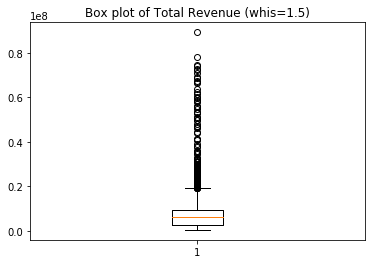

In [21]:
plt.boxplot(education1_df['TOTAL_REVENUE'])
plt.title('Box plot of Total Revenue (whis=1.5)')
plt.show()

above plot is too compressed; using the histogram,it is easier to see how far out the outliers span; will change whis to 8 (below)

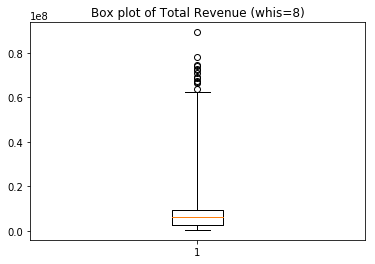

In [22]:
plt.boxplot(education1_df['TOTAL_REVENUE'], whis=8)
plt.title('Box plot of Total Revenue (whis=8)')
plt.show()

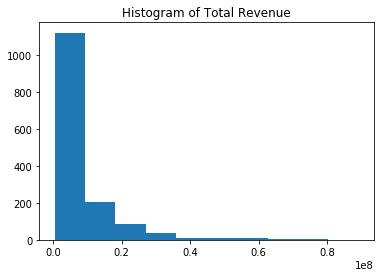

In [23]:
plt.hist(education1_df['TOTAL_REVENUE'])
plt.title('Histogram of Total Revenue')
plt.show()

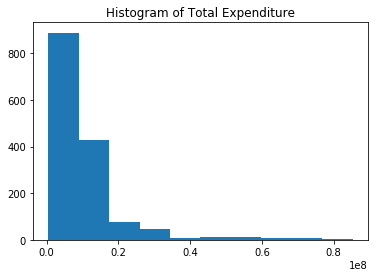

In [25]:
plt.hist(education1_df['TOTAL_EXPENDITURE'])
plt.title('Histogram of Total Expenditure')
plt.show()

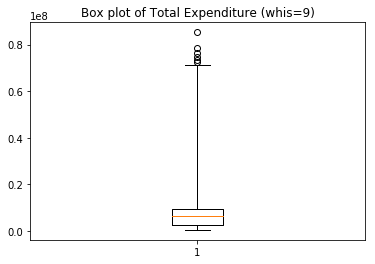

In [26]:
plt.boxplot(education1_df['TOTAL_EXPENDITURE'], whis=9)
plt.title('Box plot of Total Expenditure (whis=9)')
plt.show()

In [27]:
from scipy.stats import zscore

z_scores = zscore(education1_df['TOTAL_REVENUE'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,   96,  108,  137,  150,  161,  190,  201,
        213,  241,  252,  264,  292,  304,  316,  344,  355,  367,  396,
        407,  420,  449,  460,  472,  481,  501,  512,  524,  552,  564,
        576,  605,  616,  628,  633,  637,  654,  656,  662,  668,  680,
        685,  689,  706,  708,  714,  719,  731,  737,  741,  758,  760,
        763,  766,  771,  784,  789,  793,  802,  811,  813,  816,  819,
        824,  836,  842,  846,  855,  863,  865,  868,  871,  876,  891,
        897,  901,  919,  921,  924,  927,  932,  944,  950,  954,  971,
        973,  976,  979,  984,  997, 1002, 1006, 1023, 1025, 1028, 1031,
       1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285], dtype=int64),)
Number of

In [28]:
from scipy.stats import zscore

z_scores = zscore(education1_df['TOTAL_EXPENDITURE'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   56,   85,  108,  137,  150,  161,  190,  213,  241,
        252,  264,  292,  304,  316,  344,  355,  367,  396,  407,  420,
        449,  460,  472,  481,  501,  512,  524,  533,  552,  564,  576,
        585,  605,  611,  616,  628,  633,  637,  654,  656,  662,  668,
        680,  685,  689,  698,  706,  708,  714,  719,  731,  737,  741,
        750,  758,  760,  763,  766,  771,  784,  789,  793,  811,  813,
        816,  819,  824,  836,  842,  846,  855,  863,  865,  868,  871,
        876,  891,  897,  901,  919,  921,  924,  927,  932,  944,  950,
        954,  971,  973,  976,  979,  984,  997, 1002, 1006, 1023, 1025,
       1028, 1031, 1036, 1048, 1053, 1057, 1075, 1077, 1080, 1083, 1088,
       1101, 1106, 1110, 1127, 1129, 1132, 1135, 1140, 1152, 1157, 1161,
       1178, 1180, 1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234,
       1237, 1242, 1254, 1259, 1263, 1280, 1282, 1285], dtype=int64)

In [29]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education1_df['TOTAL_REVENUE'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education1_df['TOTAL_REVENUE'] > max_val) 
                      | (education1_df['TOTAL_REVENUE'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42


In [30]:
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education1_df['TOTAL_EXPENDITURE'] > max_val) 
                      | (education1_df['TOTAL_EXPENDITURE'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 195
The score threshold is: 1.5
Number of outliers is: 151
The score threshold is: 2.0
Number of outliers is: 118
The score threshold is: 2.5
Number of outliers is: 98
The score threshold is: 3.0
Number of outliers is: 67
The score threshold is: 3.5
Number of outliers is: 54
The score threshold is: 4.0
Number of outliers is: 49
The score threshold is: 4.5
Number of outliers is: 45


In [31]:
education1_df['TOTAL_REVENUE'].describe()

count    1.492000e+03
mean     9.092082e+06
std      1.087818e+07
min      4.656500e+05
25%      2.546261e+06
50%      6.359310e+06
75%      9.276958e+06
max      8.921726e+07
Name: TOTAL_REVENUE, dtype: float64

In [32]:
education1_df['TOTAL_EXPENDITURE'].describe()

count    1.492000e+03
mean     9.196681e+06
std      1.109393e+07
min      4.816650e+05
25%      2.523968e+06
50%      6.520224e+06
75%      9.434922e+06
max      8.532013e+07
Name: TOTAL_EXPENDITURE, dtype: float64

##### Question 2
If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

used education2_df and education3_df

In [33]:
education2_df = education1_df.copy()

In [34]:
from scipy.stats.mstats import winsorize

# We apply ONE-WAY winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(education2_df['TOTAL_REVENUE'], (0, 0.10))

winsorized_views

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

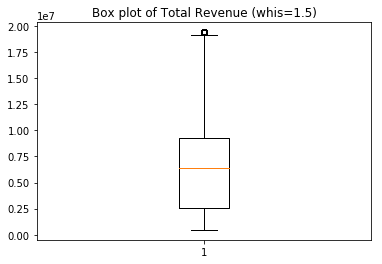

In [35]:
#We can visualize the winsorized data using a box plot:
plt.boxplot(winsorized_views)
plt.title('Box plot of Total Revenue (whis=1.5)')
plt.show()

In [36]:
#need to apply winsorization to df
education2_df['TOTAL_REVENUE'] = winsorize(education2_df['TOTAL_REVENUE'], (0, 0.10))

In [37]:
winsorized_views = winsorize(education2_df['TOTAL_EXPENDITURE'], (0, 0.10))

winsorized_views

masked_array(data=[2653798.     ,  972488.     , 3401580.     , ...,
                   9196680.86875, 9196680.86875, 9196680.86875],
             mask=False,
       fill_value=1e+20)

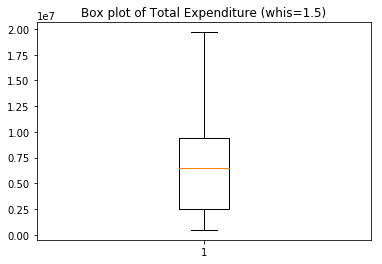

In [38]:
plt.boxplot(winsorized_views)
plt.title('Box plot of Total Expenditure (whis=1.5)')
plt.show()

In [39]:
#need to apply winsorization to df
education2_df['TOTAL_EXPENDITURE'] = winsorize(education2_df['TOTAL_EXPENDITURE'], (0, 0.10))

In [40]:
#no significant change in mean or STD
education2_df['TOTAL_REVENUE'].describe()

count    1.492000e+03
mean     7.518248e+06
std      5.723655e+06
min      4.656500e+05
25%      2.546261e+06
50%      6.359310e+06
75%      9.276958e+06
max      1.937403e+07
Name: TOTAL_REVENUE, dtype: float64

In [41]:
#no significant change in mean or STD
education2_df['TOTAL_EXPENDITURE'].describe()

count    1.492000e+03
mean     7.582929e+06
std      5.785973e+06
min      4.816650e+05
25%      2.523968e+06
50%      6.520224e+06
75%      9.434922e+06
max      1.968037e+07
Name: TOTAL_EXPENDITURE, dtype: float64

significant change in mean & STD (winsor)

In [42]:
education3_df = education1_df.copy()

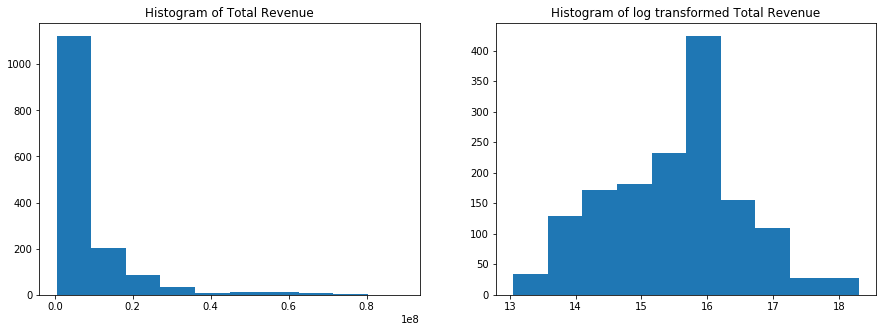

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education3_df['TOTAL_REVENUE'])
plt.title('Histogram of Total Revenue')

plt.subplot(1,2,2)
plt.hist(np.log(education3_df['TOTAL_REVENUE']))
plt.title('Histogram of log transformed Total Revenue')
plt.show()

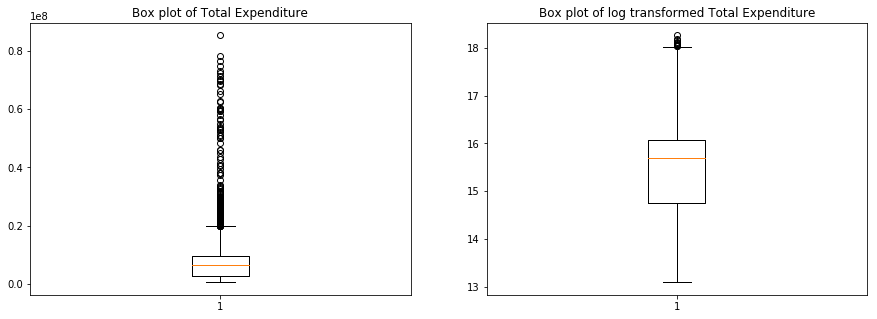

In [44]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education3_df['TOTAL_EXPENDITURE'])
plt.title('Box plot of Total Expenditure')

plt.subplot(1,2,2)
plt.boxplot(np.log(education3_df['TOTAL_EXPENDITURE']))
plt.title('Box plot of log transformed Total Expenditure')
plt.show()

In [45]:
# now we take the log of the columns and calculate
# the quartiles accordingly.
q75, q25 = np.percentile((np.log(education3_df['TOTAL_REVENUE'])), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(education3_df['TOTAL_REVENUE']) > max_val) 
                      | (np.log(education3_df['TOTAL_REVENUE']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 69
The score threshold is: 1.5
Number of outliers is: 12
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [46]:
q75, q25 = np.percentile(np.log(education3_df['TOTAL_EXPENDITURE']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(education3_df['TOTAL_EXPENDITURE']) > max_val) 
                      | (np.log(education3_df['TOTAL_EXPENDITURE']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 63
The score threshold is: 1.5
Number of outliers is: 12
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [47]:
education3_df['TOTAL_REVENUE'] = np.log(education3_df['TOTAL_REVENUE'])

In [48]:
education3_df['TOTAL_EXPENDITURE'] = np.log(education3_df['TOTAL_EXPENDITURE'])

In [49]:
education3_df['TOTAL_REVENUE'].describe()

count    1492.000000
mean       15.522416
std         1.019356
min        13.051190
25%        14.750136
50%        15.665430
75%        16.043044
max        18.306585
Name: TOTAL_REVENUE, dtype: float64

In [50]:
education3_df['TOTAL_EXPENDITURE'].describe()

count    1492.000000
mean       15.529101
std         1.023784
min        13.085004
25%        14.741343
50%        15.690419
75%        16.059928
max        18.261921
Name: TOTAL_EXPENDITURE, dtype: float64

##### Question 3
Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

used education4_df (winsor) and education5_df (log)

Both methods seem to eliminate too many outliers??

In [51]:
education4_df = education1_df.copy()

In [52]:
education4_df['BUDGET_DEFICIT'] = education4_df['TOTAL_REVENUE'] - education4_df['TOTAL_EXPENDITURE']

In [ ]:
education4_df.info()

In [ ]:
education4_df.head()

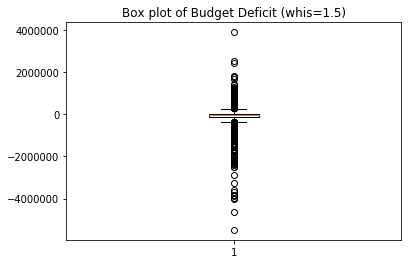

In [53]:
#check for outliers
plt.boxplot(education4_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=1.5)')
plt.show()

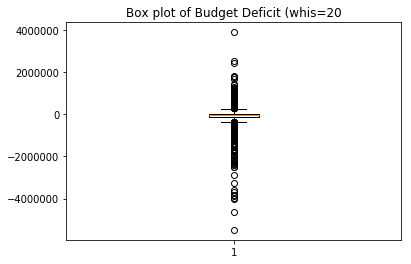

In [54]:
plt.boxplot(education4_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=20')
plt.show()

In [55]:
#prior to winsorization
education4_df['BUDGET_DEFICIT'].describe()

count    1.492000e+03
mean    -1.045990e+05
std      5.310770e+05
min     -5.487742e+06
25%     -1.360070e+05
50%     -4.849350e+04
75%      2.965425e+04
max      3.897129e+06
Name: BUDGET_DEFICIT, dtype: float64

In [56]:
z_scores = zscore(education4_df['BUDGET_DEFICIT'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  73,   88,   96,  108,  118,  148,  178,  264,  274,  316,  321,
        347,  367,  373,  399,  420,  472,  531,  583,  682,  687,  690,
        733,  739,  746,  749,  791,  793,  802,  816,  847,  868,  902,
        922,  955,  974,  976,  997, 1003, 1006, 1007, 1015, 1023, 1026,
       1028, 1057, 1058, 1065, 1067, 1075, 1093, 1099, 1103, 1110, 1111,
       1117, 1119, 1132, 1154, 1162, 1170, 1178, 1183, 1186, 1205, 1213,
       1219, 1221, 1229, 1234, 1252, 1254, 1256, 1264, 1271, 1272],
      dtype=int64),)
Number of outliers is: 76
The score threshold is: 2
The indices of the outliers:
(array([  96,  264,  316,  472,  902,  955,  974,  997, 1006, 1007, 1058,
       1075, 1111, 1162, 1170, 1183, 1213, 1221, 1234, 1254, 1264, 1272],
      dtype=int64),)
Number of outliers is: 22
The score threshold is: 3
The indices of the outliers:
(array([  96,  264,  902,  955,  974, 1234, 1254], dtype=int64),)
Number of outliers i

In [57]:
q75, q25 = np.percentile(education4_df['BUDGET_DEFICIT'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education4_df['BUDGET_DEFICIT'] > max_val) 
                      | (education4_df['BUDGET_DEFICIT'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 358
The score threshold is: 1.5
Number of outliers is: 275
The score threshold is: 2.0
Number of outliers is: 231
The score threshold is: 2.5
Number of outliers is: 182
The score threshold is: 3.0
Number of outliers is: 147
The score threshold is: 3.5
Number of outliers is: 124
The score threshold is: 4.0
Number of outliers is: 111
The score threshold is: 4.5
Number of outliers is: 97


In [69]:
winsorized_views = winsorize(education4_df['BUDGET_DEFICIT'], (0.10, 0.10))

winsorized_views

masked_array(data=[  25087.        ,   77103.        , -143501.        ,
                   ..., -104599.01015625, -104599.01015625,
                   -104599.01015625],
             mask=False,
       fill_value=1e+20)

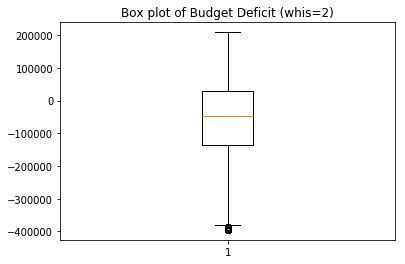

In [70]:
plt.boxplot(winsorized_views)
plt.title('Box plot of Budget Deficit (whis=2)')
plt.show()

Still some outliers after applying 90th percentile winsor. Do not feel comfortable going lower than 90th percentile. 

In [73]:
#apply to df
education4_df['BUDGET_DEFICIT'] = winsorize(education4_df['BUDGET_DEFICIT'], (0.10, 0.10))

In [74]:
education4_df['BUDGET_DEFICIT'].describe()

count      1492.000000
mean     -66300.347958
std      172254.236587
min     -395270.000000
25%     -136007.000000
50%      -48493.500000
75%       29654.250000
max      208528.000000
Name: BUDGET_DEFICIT, dtype: float64

In [75]:
education5_df = education1_df.copy()

In [76]:
education5_df['BUDGET_DEFICIT'] = education5_df['TOTAL_REVENUE'] - education5_df['TOTAL_EXPENDITURE']

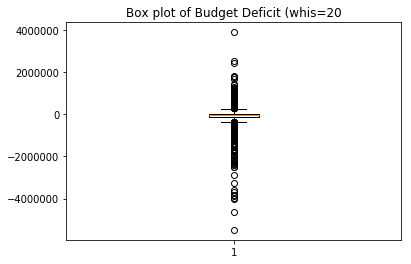

In [77]:
plt.boxplot(education5_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=20')
plt.show()

In [78]:
z_scores = zscore(education5_df['BUDGET_DEFICIT'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  73,   88,   96,  108,  118,  148,  178,  264,  274,  316,  321,
        347,  367,  373,  399,  420,  472,  531,  583,  682,  687,  690,
        733,  739,  746,  749,  791,  793,  802,  816,  847,  868,  902,
        922,  955,  974,  976,  997, 1003, 1006, 1007, 1015, 1023, 1026,
       1028, 1057, 1058, 1065, 1067, 1075, 1093, 1099, 1103, 1110, 1111,
       1117, 1119, 1132, 1154, 1162, 1170, 1178, 1183, 1186, 1205, 1213,
       1219, 1221, 1229, 1234, 1252, 1254, 1256, 1264, 1271, 1272],
      dtype=int64),)
Number of outliers is: 76
The score threshold is: 2
The indices of the outliers:
(array([  96,  264,  316,  472,  902,  955,  974,  997, 1006, 1007, 1058,
       1075, 1111, 1162, 1170, 1183, 1213, 1221, 1234, 1254, 1264, 1272],
      dtype=int64),)
Number of outliers is: 22
The score threshold is: 3
The indices of the outliers:
(array([  96,  264,  902,  955,  974, 1234, 1254], dtype=int64),)
Number of outliers i

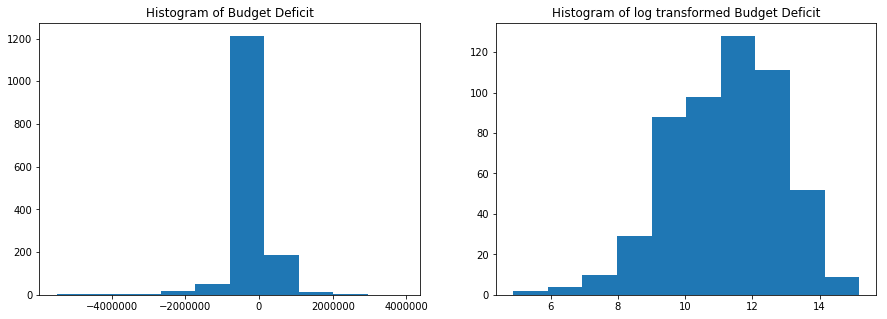

In [79]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education5_df['BUDGET_DEFICIT'])
plt.title('Histogram of Budget Deficit')

plt.subplot(1,2,2)
plt.hist(np.log(education5_df['BUDGET_DEFICIT']))
plt.title('Histogram of log transformed Budget Deficit')
plt.show()

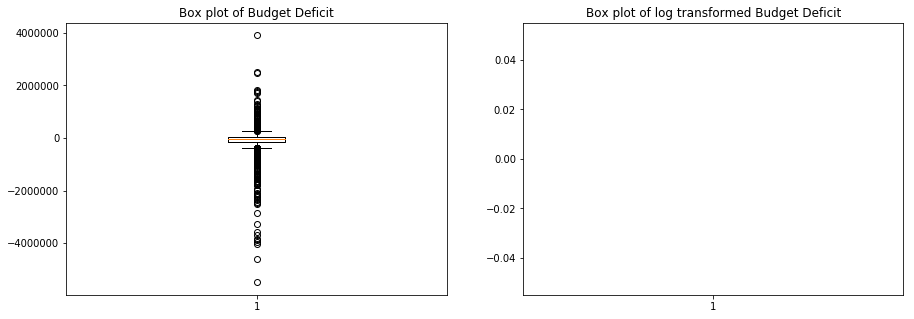

In [80]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education5_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(np.log(education5_df['BUDGET_DEFICIT']))
plt.title('Box plot of log transformed Budget Deficit')
plt.show()

In [81]:
education5_df['BUDGET_DEFICIT'] = np.log(education5_df['BUDGET_DEFICIT'])

In [82]:
education5_df['BUDGET_DEFICIT'].describe()

count    531.000000
mean      11.209468
std        1.628871
min        4.890349
25%       10.031516
50%       11.333356
75%       12.388852
max       15.175751
Name: BUDGET_DEFICIT, dtype: float64

##### Question 4
Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

using df where outliers from REVENUE & EXPENDITURE have been changed:
education6_df (copied from education2_df/winsorized) and
education7_df (copied from education3_df/log transf) 

In [83]:
#from previously winsorized df
education6_df = education2_df.copy()

In [84]:
education6_df['BUDGET_DEFICIT'] = education6_df['TOTAL_REVENUE'] - education6_df['TOTAL_EXPENDITURE']

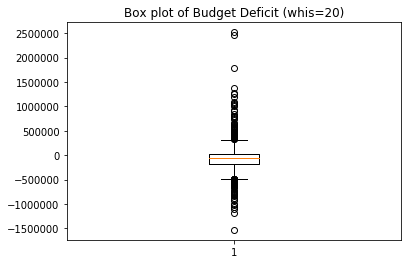

In [85]:
#check for outliers
plt.boxplot(education6_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=20)')
plt.show()

In [86]:
z_scores = zscore(education6_df['BUDGET_DEFICIT'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  21,   30,   73,   88,   96,  115,  118,  170,  178,  222,  244,
        274,  295,  318,  321,  322,  347,  373,  374,  399,  422,  425,
        426,  452,  474,  478,  479,  504,  530,  531,  574,  578,  583,
        588,  594,  626,  634,  635,  640,  657,  660,  678,  682,  686,
        687,  690,  697,  733,  738,  739,  742,  744,  746,  749,  752,
        755,  786,  790,  791,  796,  798,  814,  838,  844,  847,  849,
        853,  893,  899,  902,  908,  922,  952,  955,  974,  999, 1003,
       1004, 1007, 1014, 1015, 1016, 1026, 1042, 1050, 1058, 1065, 1067,
       1081, 1093, 1094, 1099, 1103, 1111, 1117, 1119, 1146, 1150, 1154,
       1162, 1166, 1168, 1170, 1195, 1201, 1205, 1213, 1219, 1221, 1252,
       1255, 1256, 1260, 1261, 1264, 1270, 1271, 1272], dtype=int64),)
Number of outliers is: 118
The score threshold is: 2
The indices of the outliers:
(array([  96,  118,  178,  274,  347,  373,  399,  583,  687,

In [87]:
q75, q25 = np.percentile(education6_df['BUDGET_DEFICIT'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education6_df['BUDGET_DEFICIT'] > max_val) 
                      | (education6_df['BUDGET_DEFICIT'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 188
The score threshold is: 1.5
Number of outliers is: 131
The score threshold is: 2.0
Number of outliers is: 82
The score threshold is: 2.5
Number of outliers is: 60
The score threshold is: 3.0
Number of outliers is: 37
The score threshold is: 3.5
Number of outliers is: 28
The score threshold is: 4.0
Number of outliers is: 21
The score threshold is: 4.5
Number of outliers is: 16


In [88]:
#prior to changes in outliers for BUDGET_DEFICIT
education6_df['BUDGET_DEFICIT'].describe()

count    1.492000e+03
mean    -6.468178e+04
std      2.682253e+05
min     -1.531644e+06
25%     -1.811838e+05
50%     -6.565100e+04
75%      2.047350e+04
max      2.520706e+06
Name: BUDGET_DEFICIT, dtype: float64

In [93]:
winsorized_views = winsorize(education6_df['BUDGET_DEFICIT'], (0.10, 0.10))

winsorized_views

masked_array(data=[  25087.        ,   77103.        , -143501.        ,
                   ..., -104599.01015625, -104599.01015625,
                   -104599.01015625],
             mask=False,
       fill_value=1e+20)

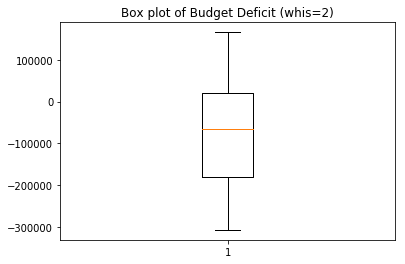

In [94]:
plt.boxplot(winsorized_views)
plt.title('Box plot of Budget Deficit (whis=2)')
plt.show()

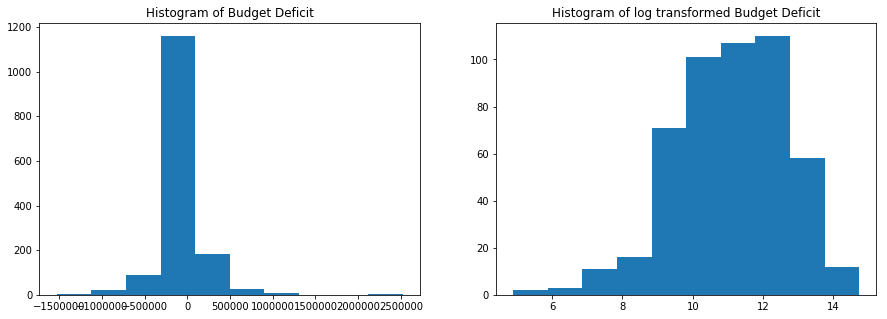

In [91]:
#look at log transformation
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education6_df['BUDGET_DEFICIT'])
plt.title('Histogram of Budget Deficit')

plt.subplot(1,2,2)
plt.hist(np.log(education6_df['BUDGET_DEFICIT']))
plt.title('Histogram of log transformed Budget Deficit')
plt.show()

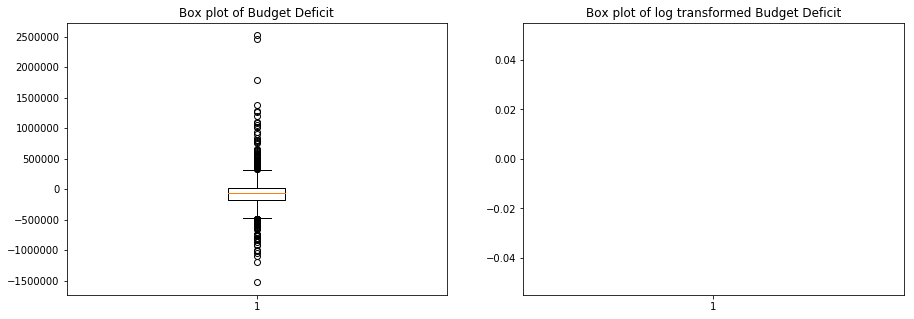

In [92]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education6_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(np.log(education6_df['BUDGET_DEFICIT']))
plt.title('Box plot of log transformed Budget Deficit')
plt.show()

In [95]:
#apply winsor to df
education6_df['BUDGET_DEFICIT'] = winsorize(education6_df['BUDGET_DEFICIT'], (0.10, 0.10))

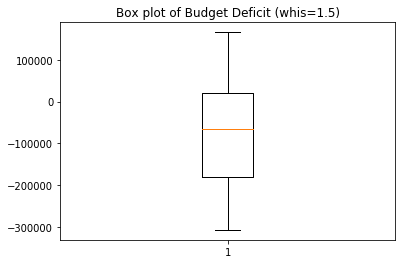

In [96]:
plt.boxplot(education6_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=1.5)')
plt.show()

In [97]:
education6_df['BUDGET_DEFICIT'].describe()

count      1492.000000
mean     -74987.851979
std      149006.815983
min     -306344.000000
25%     -181183.750000
50%      -65651.000000
75%       20473.500000
max      165510.000000
Name: BUDGET_DEFICIT, dtype: float64

In [99]:
#from previously log transformed
education7_df = education3_df.copy()

In [100]:
education7_df['BUDGET_DEFICIT'] = education7_df['TOTAL_REVENUE'] - education7_df['TOTAL_EXPENDITURE']

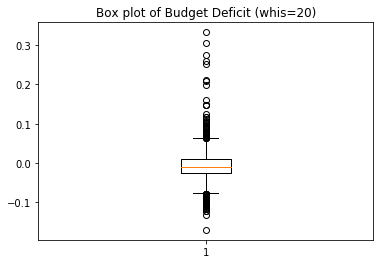

In [101]:
#check for outliers
plt.boxplot(education7_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=20)')
plt.show()

In [102]:
z_scores = zscore(education7_df['BUDGET_DEFICIT'])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   1,   17,   21,   26,   53,   69,   71,   73,   88,   96,  118,
        122,  136,  156,  163,  164,  170,  178,  189,  203,  216,  240,
        248,  264,  268,  274,  302,  318,  328,  339,  347,  360,  369,
        370,  373,  380,  391,  399,  403,  415,  419,  422,  423,  432,
        442,  443,  456,  474,  478,  479,  485,  486,  508,  531,  536,
        571,  574,  583,  588,  589,  612,  623,  626,  635,  640,  660,
        663,  678,  682,  687,  690,  692,  703,  715,  726,  733,  739,
        744,  746,  749,  752,  755,  791,  796,  798,  802,  807,  816,
        822,  831,  844,  845,  847,  849,  868,  886,  893,  899,  900,
        902,  922,  952,  953,  955,  974,  999, 1003, 1004, 1005, 1007,
       1015, 1017, 1020, 1026, 1052, 1055, 1056, 1058, 1065, 1075, 1081,
       1093, 1094, 1099, 1103, 1111, 1116, 1117, 1119, 1154, 1159, 1160,
       1162, 1167, 1170, 1176, 1183, 1201, 1205, 1210, 1211, 1213, 1

In [103]:
q75, q25 = np.percentile(education7_df['BUDGET_DEFICIT'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education7_df['BUDGET_DEFICIT'] > max_val) 
                      | (education7_df['BUDGET_DEFICIT'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 209
The score threshold is: 1.5
Number of outliers is: 107
The score threshold is: 2.0
Number of outliers is: 51
The score threshold is: 2.5
Number of outliers is: 26
The score threshold is: 3.0
Number of outliers is: 16
The score threshold is: 3.5
Number of outliers is: 13
The score threshold is: 4.0
Number of outliers is: 10
The score threshold is: 4.5
Number of outliers is: 8


In [104]:
#prior to changes in outliers for BUDGET_DEFICIT
education7_df['BUDGET_DEFICIT'].describe()

count    1492.000000
mean       -0.006685
std         0.040840
min        -0.170369
25%        -0.024762
50%        -0.011439
75%         0.010570
max         0.332627
Name: BUDGET_DEFICIT, dtype: float64

In [105]:
winsorized_views = winsorize(education7_df['BUDGET_DEFICIT'], (0.10, 0.10))

winsorized_views

masked_array(data=[ 0.00940884,  0.03554909, -0.04310227, ...,
                   -0.01143873, -0.01143873, -0.01143873],
             mask=False,
       fill_value=1e+20)

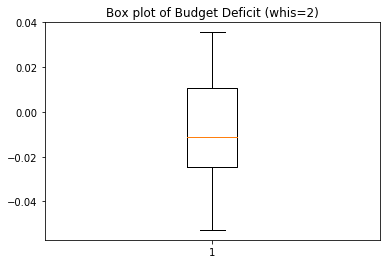

In [106]:
plt.boxplot(winsorized_views)
plt.title('Box plot of Budget Deficit (whis=2)')
plt.show()

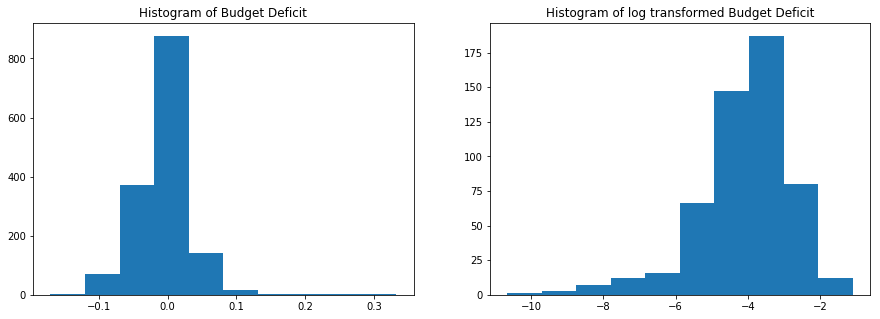

In [107]:
#look at log transformation
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education7_df['BUDGET_DEFICIT'])
plt.title('Histogram of Budget Deficit')

plt.subplot(1,2,2)
plt.hist(np.log(education7_df['BUDGET_DEFICIT']))
plt.title('Histogram of log transformed Budget Deficit')
plt.show()

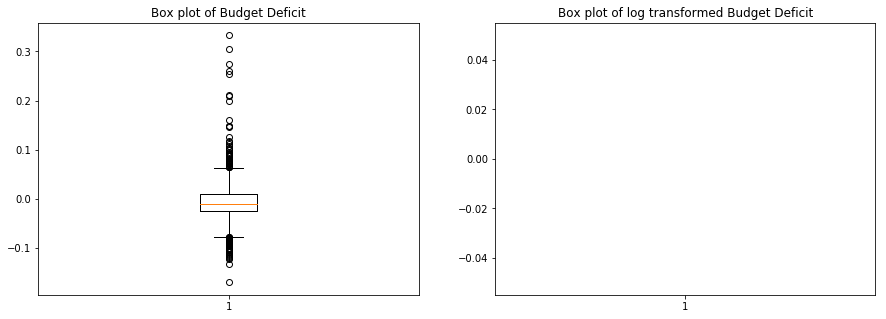

In [108]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(education7_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(np.log(education7_df['BUDGET_DEFICIT']))
plt.title('Box plot of log transformed Budget Deficit')
plt.show()

In [109]:
#apply log transformation to df
education7_df['BUDGET_DEFICIT'] = np.log(education7_df['BUDGET_DEFICIT'])

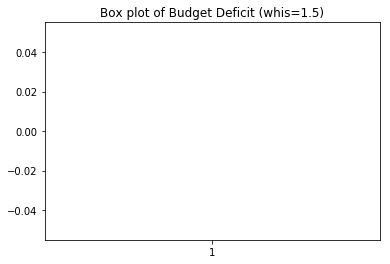

In [110]:
plt.boxplot(education7_df['BUDGET_DEFICIT'])
plt.title('Box plot of Budget Deficit (whis=1.5)')
plt.show()

In [111]:
education7_df['BUDGET_DEFICIT'].describe()

count    531.000000
mean      -4.098942
std        1.288610
min      -10.671270
25%       -4.701471
50%       -3.899573
75%       -3.268945
max       -1.100733
Name: BUDGET_DEFICIT, dtype: float64

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [113]:
#winsor BUDGET_DEFICIT column only
education4_df['BUDGET_DEFICIT'].describe()

count      1492.000000
mean     -66300.347958
std      172254.236587
min     -395270.000000
25%     -136007.000000
50%      -48493.500000
75%       29654.250000
max      208528.000000
Name: BUDGET_DEFICIT, dtype: float64

In [114]:
#log transform BUDGET_DEFICIT column only
education5_df['BUDGET_DEFICIT'].describe()

count    531.000000
mean      11.209468
std        1.628871
min        4.890349
25%       10.031516
50%       11.333356
75%       12.388852
max       15.175751
Name: BUDGET_DEFICIT, dtype: float64

In [115]:
#winsor TOTAL_REVENUE, TOTAL_EXPENDITURE, and BUDGET_DEFICIT columns
education6_df['BUDGET_DEFICIT'].describe()

count      1492.000000
mean     -74987.851979
std      149006.815983
min     -306344.000000
25%     -181183.750000
50%      -65651.000000
75%       20473.500000
max      165510.000000
Name: BUDGET_DEFICIT, dtype: float64

In [116]:
#log transform TOTAL_REVENUE, TOTAL_EXPENDITURE, and BUDGET_DEFICIT columns
education7_df['BUDGET_DEFICIT'].describe()

count    531.000000
mean      -4.098942
std        1.288610
min      -10.671270
25%       -4.701471
50%       -3.899573
75%       -3.268945
max       -1.100733
Name: BUDGET_DEFICIT, dtype: float64

Not sure what happened with the log transformation dataframes, but the count is much lower in these dataframes. 

The education4_df & education5_df had outliers changed on only the BUDGET_DEFICIT column. The education6_df & education7_df had outliers transformed on both the TOTAL_REVENUE and TOTAL_EXPENDITURE columns as well as the BUDGET_DEFICIT column.
The log transformed columns do not seem to make sense based on the original data. 

The winsor method appears to be more appropriate for this dataset.